In [2]:
####### learning rate 0.1 resnet18 vs  learning rate 0.01 
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/experiments/lr_1e-3/experiment1/"

TAR_CONFIG_PAT = "/home/yifan/experiments/lr_1e-3/"

REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 100
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(TAR_CONFIG_PAT,TAR_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,1,0.3,0.05)


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8494.69it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7813.01it/s]


absolute alignment indicates number: 161 label diff indicates number: 1220 confidence diff indicates number: 948 high distance number: 319


In [3]:
from alignment.TrainingSnapshotAlignmentCKA import TrainingSnapshotAlignment
alignment2 = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH )

In [4]:
X = ref_train_data[absolute_alignment_indicates]
Y = tar_train_data[absolute_alignment_indicates]

R = alignment2.align_embeddings(Y,X,500)

iteration 0, loss1 102446624.0 loss2 {tensor(0.8515, grad_fn=<RsubBackward1>)}
iteration 99, loss1 11779.64453125 loss2 {tensor(0.8070, grad_fn=<RsubBackward1>)}
iteration 198, loss1 2673.119140625 loss2 {tensor(0.8497, grad_fn=<RsubBackward1>)}
iteration 297, loss1 1014.2562255859375 loss2 {tensor(0.8305, grad_fn=<RsubBackward1>)}
iteration 396, loss1 542.8349609375 loss2 {tensor(0.7990, grad_fn=<RsubBackward1>)}
iteration 495, loss1 369.1262512207031 loss2 {tensor(0.7678, grad_fn=<RsubBackward1>)}


In [5]:
X = ref_train_data[absolute_alignment_indicates]
Y = tar_train_data[absolute_alignment_indicates]

S = alignment2.align_embeddings(X,Y,500)

iteration 0, loss1 58476316.0 loss2 {tensor(0.8286, grad_fn=<RsubBackward1>)}
iteration 99, loss1 16552.083984375 loss2 {tensor(0.7638, grad_fn=<RsubBackward1>)}
iteration 198, loss1 6279.0986328125 loss2 {tensor(0.8052, grad_fn=<RsubBackward1>)}
iteration 297, loss1 2899.685546875 loss2 {tensor(0.8223, grad_fn=<RsubBackward1>)}
iteration 396, loss1 1616.3175048828125 loss2 {tensor(0.8187, grad_fn=<RsubBackward1>)}
iteration 495, loss1 1057.2515869140625 loss2 {tensor(0.8009, grad_fn=<RsubBackward1>)}


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8557.36it/s]


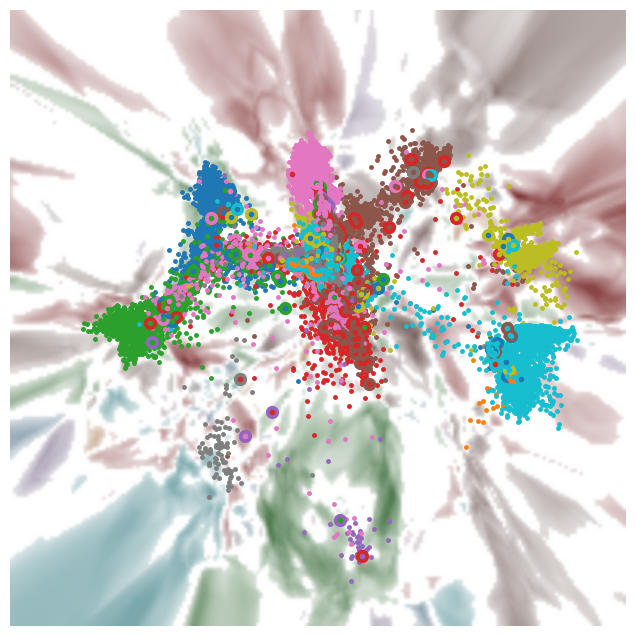

In [6]:
ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, I,I, np.dot(tar_train_data, R.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join(save_dir, "/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/learningr"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 2671.46it/s]


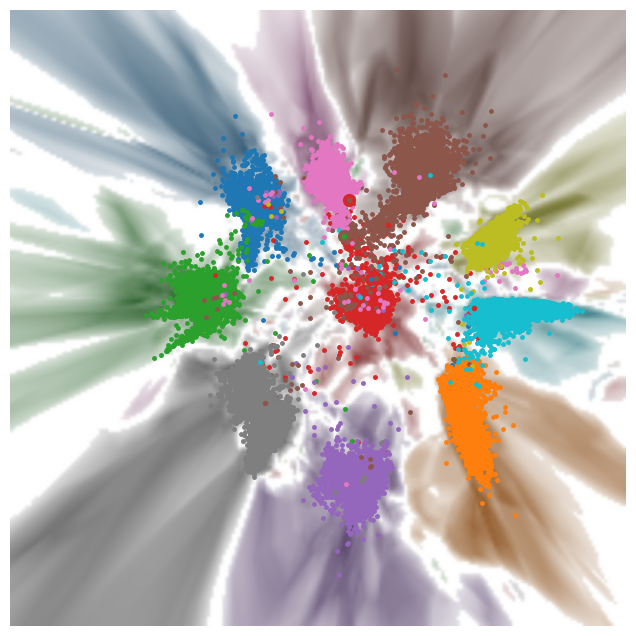

In [46]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(200),I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6636.85it/s]


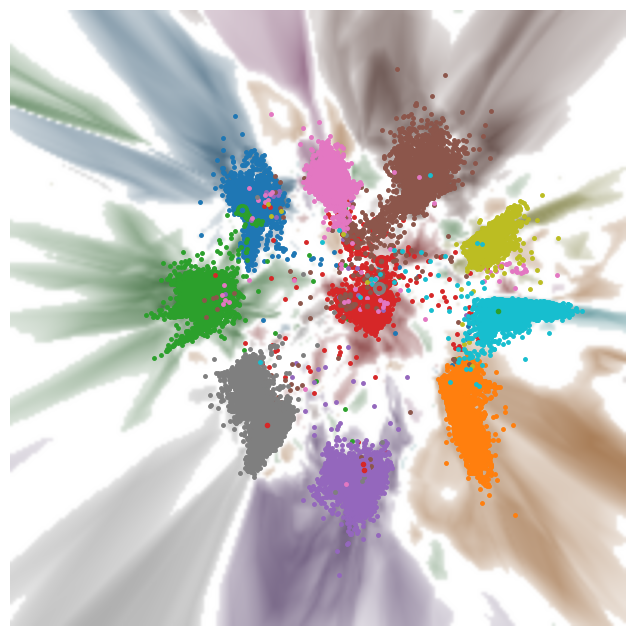

In [56]:
ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, S.detach().numpy(),I, np.dot(ref_train_data,I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join(save_dir, "/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/learningr"))